In [621]:
import csv
import pandas as pd
import numpy as np
import itertools
import plotly
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
%matplotlib inline

### Data preprocessing
- Storing x-values and target-values
- Tranforming M/B to binary 1/0
- Standardise and normalize data
- Split in training and test set

### Build model

In [622]:
data = pd.read_csv("/Users/anineahlsand/iCloud Drive (arkiv)/Documents/Dokumenter/Documents/Skole/NTNU/Maskinlæring/Project/ML-Project/data/data.csv")
x = data.iloc[:,2:32].values
y = data.iloc[:,1:2].values
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()
sc = StandardScaler()
x = sc.fit_transform(x)
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)

In [623]:
opt = SGD(lr=0.01, nesterov=True)
#opt = Adam(lr=0.01)
model = Sequential()
model.add(Dense(units=32, input_shape=(30,), activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

### Train model

In [624]:
trained_model = model.fit(x_train, y_train, shuffle='Logical',epochs=100, batch_size=32)

Epoch 1/100
16/16 [==============================] - 0s 9ms/step - loss: 0.7125 - accuracy: 0.4688
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.6582
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6399 - accuracy: 0.7520
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.8027
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.8340
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.8535
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5499 - accuracy: 0.8828
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.8984
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.9082
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.9199
Epoch 11/

In [625]:
y_pred = model.predict(x_test)

In [626]:
#Converting predictions to label
predictions = []
for i in range(len(y_pred)):
    predictions.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [627]:
accuracy = accuracy_score(test,predictions)
precision =precision_score(test,predictions)
recall = recall_score(test,predictions)
f1 = f1_score(test,predictions)

print('Accuracy is:', accuracy*100)
print('Recall is:', recall*100)
print('Precision is:', precision*100)
print('F1 is:', f1*100)

Accuracy is: 98.24561403508771
Recall is: 100.0
Precision is: 95.65217391304348
F1 is: 97.77777777777777


## Plotting data

Confusion matrix, without normalization
[[34  1]
 [ 0 22]]


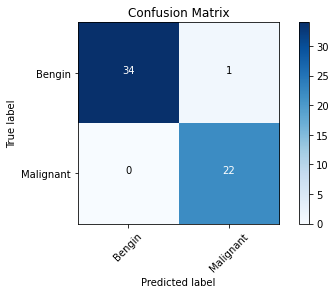

In [628]:
cm = confusion_matrix(y_true=test, y_pred=predictions)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm_plot_labels = ['Bengin','Malignant']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')